In [14]:
#Q1. How can you create a Bokeh plot using Python code?

import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()
from bokeh.plotting import figure , output_file, show
from bokeh.sampledata.iris import flowers

output_file('bokeh_lib.html')

d = figure(title = 'Data')
d.xaxis.axis_label = "x-axis data"
d.yaxis.axis_label = "y-axis data"
d.line([1,3,5,6,7,8,9], [11,23,18,21,19,26,30])
show(d)

Loading BokehJS ...

In [18]:
#Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.


''' Glyphs are visual shapes that are drawn to represent the data such as circles, squares, lines, rectangles, etc.  '''

#Example:
c = figure(title = 'Example')
c.circle([1,3,5,6,7,8,9], [11,23,18,21,19,26,30], size=20)
show(c)

In [47]:
#Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

'''Some of the customizations available in Bokeh:'''

c = figure(title = 'Customizing a Bokeh plot')
c.circle([1,3,5,6,7,8,9], [11,23,18,21,19,26,30], size=10, color='grey', alpha=0.5, line_color='black',
         legend_label='Data points')

#Title:
c.title.text_color = "purple"
c.title.text_font_size = "500"

c.width = 400
c.height = 250

#Axes:
c.xaxis.axis_label = "x-axis data"
c.xaxis.axis_line_color = "blue"
c.xaxis.major_label_text_color = "grey"

c.yaxis.axis_label = "y-axis data"
c.yaxis.major_label_text_color = "grey"
c.yaxis.axis_line_color = "blue"

#Legend:
c.legend.location = 'top_center'
c.legend.label_text_font_style = "bold"
c.legend.label_text_color = "blue"
c.legend.border_line_color = "black"
c.legend.background_fill_color = "grey"
c.legend.background_fill_alpha = 0.3


show(c)



In [13]:
#Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?

'''The Bokeh server is a component of Bokeh that allows you to build interactive web applications that are connected
to Python code running on a server.'''

import numpy as np
from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Slider, TextInput
from bokeh.plotting import figure
N = 200
x = np.linspace(0, 4*np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data = dict(x = x, y = y))
plot = figure(plot_height = 400, plot_width = 400, title = "sine wave")
plot.line('x', 'y', source = source, line_width = 3, line_alpha = 0.6)
freq = Slider(title = "frequency", value = 1.0, start = 0.1, end = 5.1, step = 0.1)
def update_data(attrname, old, new):
   a = 1
   b = 0
   w = 0
   k = freq.value
   x = np.linspace(0, 4*np.pi, N)
   y = a*np.sin(k*x + w) + b
   source.data = dict(x = x, y = y)
freq.on_change('value', update_data)
curdoc().add_root(row(freq, plot, width = 500))
curdoc().title = "Sliders"



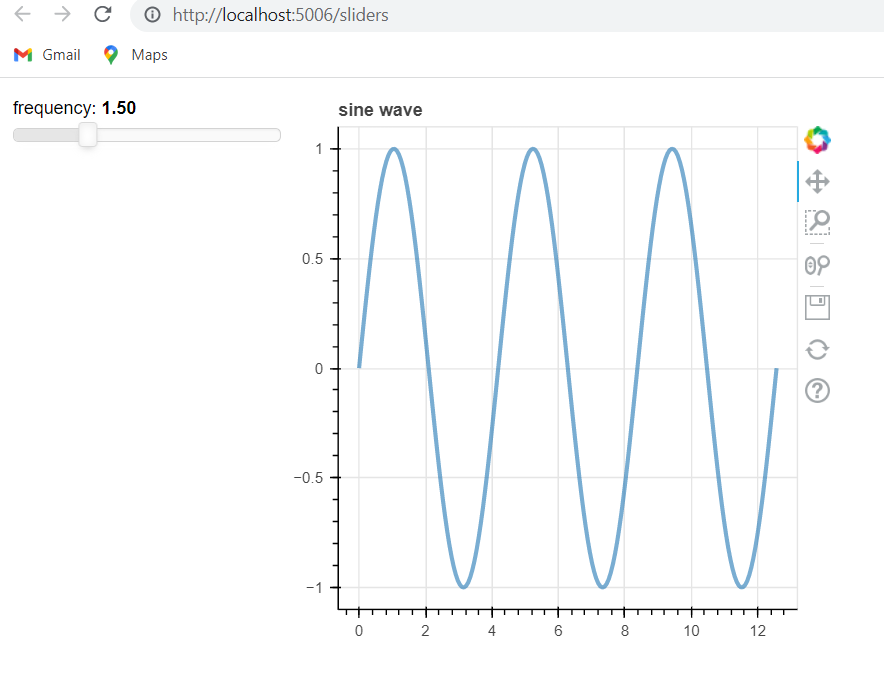

In [ ]:
#Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

from flask import Flask
from bokeh.plotting import figure 
from bokeh.resources import CDN
from bokeh.embed import file_html

app = Flask(__name__)

@app.route('/')
def world():
   c = figure(title = 'Example', height=350, width=400)
   c.circle([1,3,5,6,7,8,9], [11,23,18,21,19,26,30], size=15)
   graph = file_html(c, CDN, "Scatter plot")
   return (graph)

if __name__=='__main__':
    app.run(host='0.0.0.0')

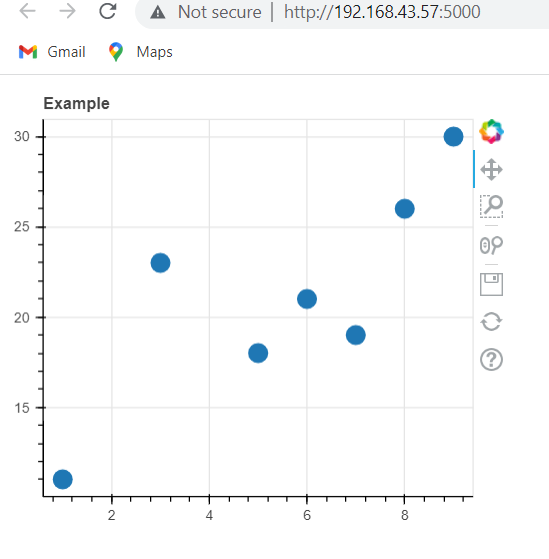